In [2]:
from scipy import stats
from scipy import optimize

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [29]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [30]:
print('Mean of gauss', np.mean(s),'Media: ', np.median(s))

Mean of gauss 0.0002422895846725306 Media:  9.210741427420575e-05


In [31]:
print('Variance ', s.var(ddof=1), 'std', s.std(ddof=1)) 

Variance  0.01100435430695867 std 0.10490164110708025


In [53]:
np.random.seed(123456789)
x= np.random.randn(5)

In [54]:
print('Variance x', x.var(), 'std', x.std()) 

Variance x 0.6824450509031773 std 0.8261023247172091


Text(0.5,1,'rand')

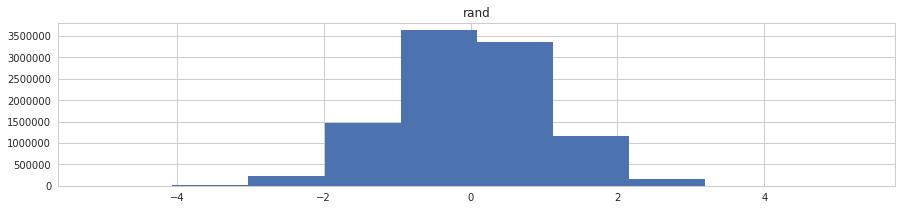

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(15, 3))
axes.hist(np.random.randn(10000000))
axes.set_title("rand")

In [101]:
# normal distribution
mu,sigma = 1,0.5
X = stats.norm(1, 0.5)

In [102]:
X.mean()

1.0

In [103]:
X.median()

1.0

In [104]:
X.std()

0.5

In [105]:
X.var()

0.25

In [106]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [107]:
X.pdf

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3e04559978>>

In [108]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [109]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [110]:
# Interval method - use for confidence interval  ie 95% is within 2 std
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [130]:
def plot_rv_distribution(X, axes=None):    
    """Plot the PDF or PMF(Probability mass function ), CDF, SF(survival function) and PPF(Point probability function ) of a given random variable"""
    if axes is not None:       
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
        x_min_999, x_max_999 = X.interval(0.999)        
        x999 = np.linspace(x_min_999, x_max_999, 1000)
        x_min_95, x_max_95 = X.interval(0.95)
        x95 = np.linspace(x_min_95, x_max_95, 1000)
        
        if hasattr(X.dist, "pdf"):
            axes[0].plot(x999, X.pdf(x999), label="PDF")
            axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
        else:
            # discrete random variables do not have a pdf method, instead we use pmf:
            x999_int = np.unique(x999.astype(int))
            axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
            
        axes[1].plot(x999, X.cdf(x999), label="CDF")
        axes[1].plot(x999, X.sf(x999), label="SF")
        axes[2].plot(x999, X.ppf(x999), label="PPF")
        
        for ax in axes:
            ax.legend()
    

after


Text(0,0.5,'Poisson dist.')

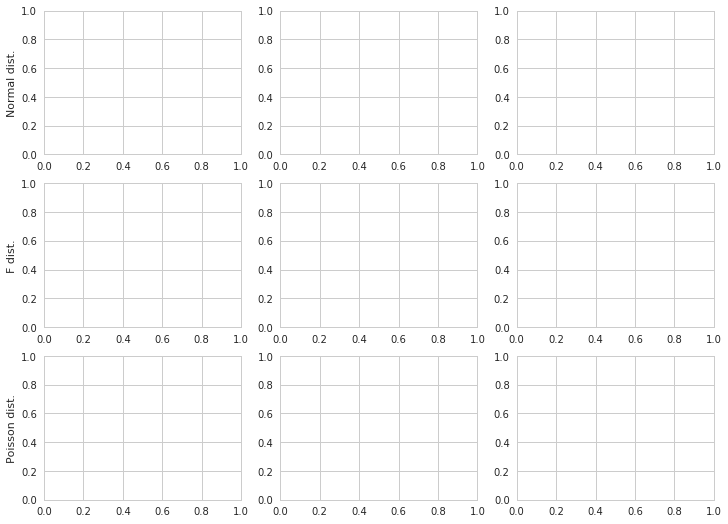

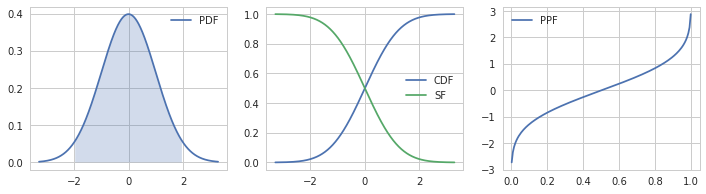

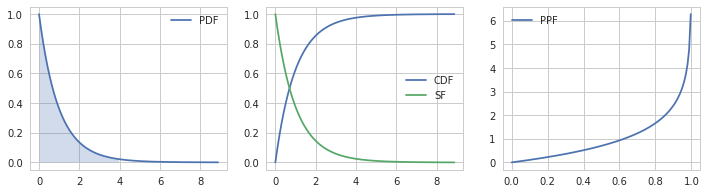

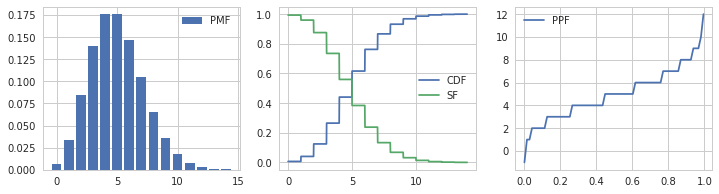

In [131]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
print('after')
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [133]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    
    """ Plot the PDF and histogram of samples of a continuous random variable"""

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)
    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    if title:
        ax.set_title(title)

    return ax


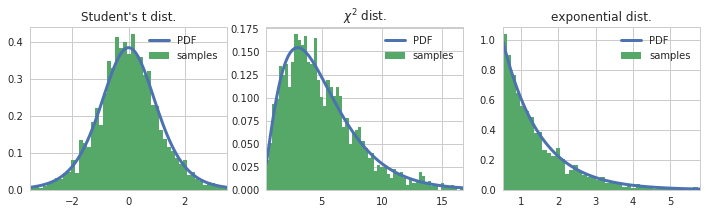

In [134]:
fig, axes = plt.subplots(1, 3,figsize=(12, 3))
N = 2000
                         
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N),"Student's t dist.", ax=axes[0])
                  
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N),r"$\chi^2$ dist.", ax=axes[1])
                  
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N),"exponential dist.", ax=axes[2])             



